## Imports

In [1]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import matplotlib
from pathlib import Path
import time
%matplotlib notebook

## Load dataset

In [2]:
path = Path().cwd()
fiel_path = path.parent / "Data" / "simulatedData.csv"
X = np.loadtxt(fiel_path, delimiter = ",")

## Helper Functions

In [3]:
def plotting(X, kmeans, y_pred, ax):
    ax.clear()
    ax.scatter(X[:,0], X[:,1], c = y_pred, marker= ".")
    ax.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c = np.arange(kmeans.cluster_centers_.shape[0]), marker= "*", s=50)
    ax.set_title("Current iteration")

<IPython.core.display.Javascript object>


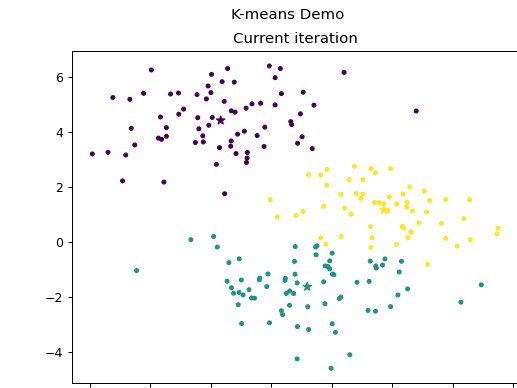

In [4]:
clusters = 3 # Control how many clusters we want

fig, ax = plt.subplots(1,1)
plt.suptitle("K-means Demo")

kmeans = KMeans(n_clusters = clusters, n_init = 1, random_state = 1, max_iter = 1)
y_pred = kmeans.fit_predict(X)

ax.scatter(X[:,0], X[:,1], marker = '.', c = y_pred)

current_iter = 0
total_iter = 10
for _ in range(total_iter):
    kmeans= KMeans(n_clusters = clusters, init = "random", n_init = 1, random_state = 0, max_iter = 1 + current_iter)
    y_pred = kmeans.fit_predict(X)
    
    plotting(X, kmeans, y_pred, ax)
    fig.canvas.draw()
    
    current_iter += 1
    print(f'Iteration nr: {current_iter}.', end='\r')
    time.sleep(1)